## Textual Analysis of International Constitutions

In [138]:
# project module with helper functions
import fletcher 
import numpy as np

#Scraping and Cleaning
import requests
from importlib import reload
from bs4 import BeautifulSoup
import json
import pickle
import nltk

#Standard Data Science 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Text Analysis Importsw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora, models, similarities, matutils
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from sklearn.metrics.pairwise import euclidean_distances
from copy import deepcopy

In [4]:
reload(fletcher)

<module 'fletcher' from '/Users/whetfield/Documents/data_science/metis_dsi/projects/proj4_Fletcher/fletcher.py'>

Took a look at the robots.text file for the site and there was no guidance.  A basic API for site is at below link.  I used this to access the Country IDs which could be used to access the webpages which each individual constitution.  

In [2]:
url = 'http://www.constituteproject.org/robots.txt'
response  = requests.get(url)
print(response.text)

<html>
 <head>
  <title>404 Not Found</title>
 </head>
 <body>
  <h1>404 Not Found</h1>
  The resource could not be found.<br /><br />



 </body>
</html>


Below commented out do all the scraping, since it takes some time, commented out and can work from pickled object loaded in the last line in the cell

In [3]:
country_id_list,enacted_updated_dict  = fletcher.get_country_ids()
#country_const_dict = fletcher.create_constitutions_dict(country_id_list)
#pickle.dump(country_const_dict, open( "country_const_dict.p", "wb" ) )
country_const_dict = pickle.load( open( "country_const_dict.p", "rb" ) )

Take a look at the usa constitution to get a feel for the current text format, what cleaning might have to be done

In [4]:
usa_usa_usa = country_const_dict['United_States_of_America_1992']
with open("US_Constitution.txt", "w") as text_file:
    text_file.write(usa_usa_usa)

Based on this, built a cleaning helper function to produce a list of strings for each constitutional clause, getting rid of white space and extraneous website / html stuff and the bottom of the Beautiful Soup Text.
Dictionary comprehension below achieves this. 

In [5]:
clean_dict = {key:fletcher.clean_const_dict_values(value) 
              for key,value in country_const_dict.items()}

Next make a dataframe with all these clauses.  Also added TextBlob Polarity and Subjectivity scores to the dataframe.  Have a dataframe of ~175k number of clauses from 212 Constitutions

In [6]:
df_cons = fletcher.make_const_clauses_dataframe(clean_dict, enacted_updated_dict)
df_cons.head()

,Clause,Country,Polarity,Stemmed_Clause,Subjectivity,Year_Amended,Year_Enacted
0,"﻿In the name of Allah, the Most Beneficent, th...",Afghanistan_2004,0.500000,﻿in the name of allah the most benefic the mos...,0.500000,None,2004
1,"Praise be to Allah, the Cherisher and Sustaine...",Afghanistan_2004,0.000000,prais be to allah the cherish and sustain of w...,0.066667,None,2004
2,We the people of Afghanistan:,Afghanistan_2004,0.000000,We the peopl of afghanistan,0.000000,None,2004
3,"Believing firmly in Almighty God, relying on H...",Afghanistan_2004,-0.200000,believ firmli in almighti god reli on hi divin...,0.400000,None,2004
4,"Realizing the previous injustices, miseries an...",Afghanistan_2004,-0.166667,realiz the previou injustic miseri and innumer...,0.166667,None,2004


In [7]:
print(df_cons.shape)

(176787, 7)


In [8]:
df_cons.loc[df_cons.Country == 'United_States_of_America_1992',]

,Clause,Country,Polarity,Stemmed_Clause,Subjectivity,Year_Amended,Year_Enacted
168867,"We the People of the United States, in Order t...",United_States_of_America_1992,0.275000,We the peopl of the unit state in order to for...,0.533333,1992,1789
168868,All legislative Powers herein granted shall be...,United_States_of_America_1992,0.000000,all legisl power herein grant shall be vest in...,0.000000,1992,1789
168869,The House of Representatives shall be composed...,United_States_of_America_1992,0.125000,the hous of repres shall be compos of member c...,0.250000,1992,1789
168870,No Person shall be a Representative who shall ...,United_States_of_America_1992,0.000000,No person shall be a repres who shall not have...,0.000000,1992,1789
168871,Representatives and direct Taxes shall be appo...,United_States_of_America_1992,0.066540,repres and direct tax shall be apport among th...,0.325968,1992,1789
168872,When vacancies happen in the Representation fr...,United_States_of_America_1992,0.000000,when vacanc happen in the represent from ani s...,0.500000,1992,1789
168873,The House of Representatives shall choose thei...,United_States_of_America_1992,-0.062500,the hous of repres shall choos their speaker a...,0.312500,1992,1789
168874,The Senate of the United States shall be compo...,United_States_of_America_1992,0.000000,the senat of the unit state shall be compos of...,0.000000,1992,1789
168875,Immediately after they shall be assembled in C...,United_States_of_America_1992,0.045455,immedi after they shall be assembl in consequ ...,0.128788,1992,1789
168876,No Person shall be a Senator who shall not hav...,United_States_of_America_1992,0.000000,No person shall be a senat who shall not have ...,0.000000,1992,1789


In [13]:
df_cons.loc[df_cons.Country == 'Mexico_2015',].to_csv("Mexico_Const.csv")

Example of a clause

In [9]:
df_cons.loc[168867, "Clause"]

'We the People of the United States, in Order to form a more perfect Union, establish Justice, insure domestic Tranquility, provide for the common defense, promote the general Welfare, and secure the Blessings of Liberty to ourselves and our Posterity, do ordain and establish this Constitution for the United States of America.'

## Topic Modeling

Take a look at basic bag of words, use stop_words key word to eliminate stop words, set n_gram range from 1 to 3 and have the mimumum occurence of feature be 1% in order for inclusion. Also used stemmed words

I thought there would a relatively limited number of topics in the corpus.  I won't show all the runs in this notebook, but looked at LDF and NMF with 5,10,20 topics.   I also adjusted if stemming was used and the minimum required occurrence of a term to be included 

NMF with 10 topics turned out to have best clarity for me.  

In [11]:
tfidf = TfidfVectorizer(stop_words='english', min_df= .01, ngram_range=(1,3))
bag_tfidif = tfidf.fit_transform(np.array(df_cons['Stemmed_Clause']))
nmf_model = NMF(n_components=10, random_state=47,beta_loss='frobenius')
nmf_topics = nmf_model.fit_transform(bag_tfidif)
bag_tfidif.shape

(176787, 254)

In [12]:
fletcher.get_lda_top_components(nmf_model,
                                tfidf.get_feature_names(),
                                top_words = 30)

Topic 1:
member elect shall parliament hous vote repres year day council commiss speaker senat elector major hous repres assembl candid number appoint parti deputi term period committe follow meet ha session held
Topic 2:
offic public minist appoint servic hi gener commiss function prime prime minist hold remov act public servic servic commiss governor perform term governor gener shall judg judici chief exercis power duti deputi advic govern
Topic 3:
law state shall govern establish organ regul state shall feder provid public accord law shall author power determin administr local forc accord law protect territori condit intern develop social execut respect institut procedur
Topic 4:
court suprem judg suprem court appeal high high court justic jurisdict court shall constitut court decis proceed chief judici order shall case tribun befor constitut determin administr rule appoint crimin matter question refer ha
Topic 5:
articl thi articl paragraph thi claus provis refer appli govern freed

## Can we interpret what these topics are?  Maybe a bit NMF with 10 Features

Topic1:  Rule of Law 

Topic2:  Legislative

Topic3:  Establishment / Elections

Topic4:  Judicial Branch --  Seems strong   

Topic5:  Extent of Law / Applicability 

Topic6:  Rights of Citizens / Property- Seems strong . 

Topic7:  Legislative  

Topic8:  Executive Branch 

Topic9:  Rights around being charged with a crime

Topic10:  Extent of Law / Applicability

Letsjust do a quick sanity check from a few clauses in the US constitution

In [266]:
#First Amendment, highest on Topic6 Rights of Citizen
print (df_cons.loc[168965,'Clause'])
nmf_topics[168965]

Congress shall make no law respecting an establishment of religion, or prohibiting the free exercise thereof; or abridging the freedom of speech, or of the press; or the right of the people peaceably to assemble, and to petition the Government for a redress of grievances.


array([0.00145566, 0.        , 0.03296611, 0.        , 0.00067421,
       0.0334174 , 0.016288  , 0.        , 0.        , 0.00256861])

In [38]:
#Article 3 Section 1, Judicial Power, highest on the Topic 4 Judicial Branch
print (df_cons.loc[168934,'Clause'])
nmf_topics[168934]

The judicial Power of the United States, shall be vested in one supreme Court, and in such inferior Courts as the Congress may from time to time ordain and establish. The Judges, both of the supreme and inferior Courts, shall hold their Offices during good Behaviour, and shall, at stated Times, receive for their Services, a Compensation, which shall not be diminished during their Continuance in Office.


array([0.00580802, 0.02760717, 0.02623053, 0.0521778 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

## Is there an interesting way to subset the data to get better topics?

I thought perhaps subjectivity scores from TextBlob may be useful, as clauses with zero subjectivity perhaps they deal with certain topics more than subjective statements.  

See distributions below of the TextBlob scores

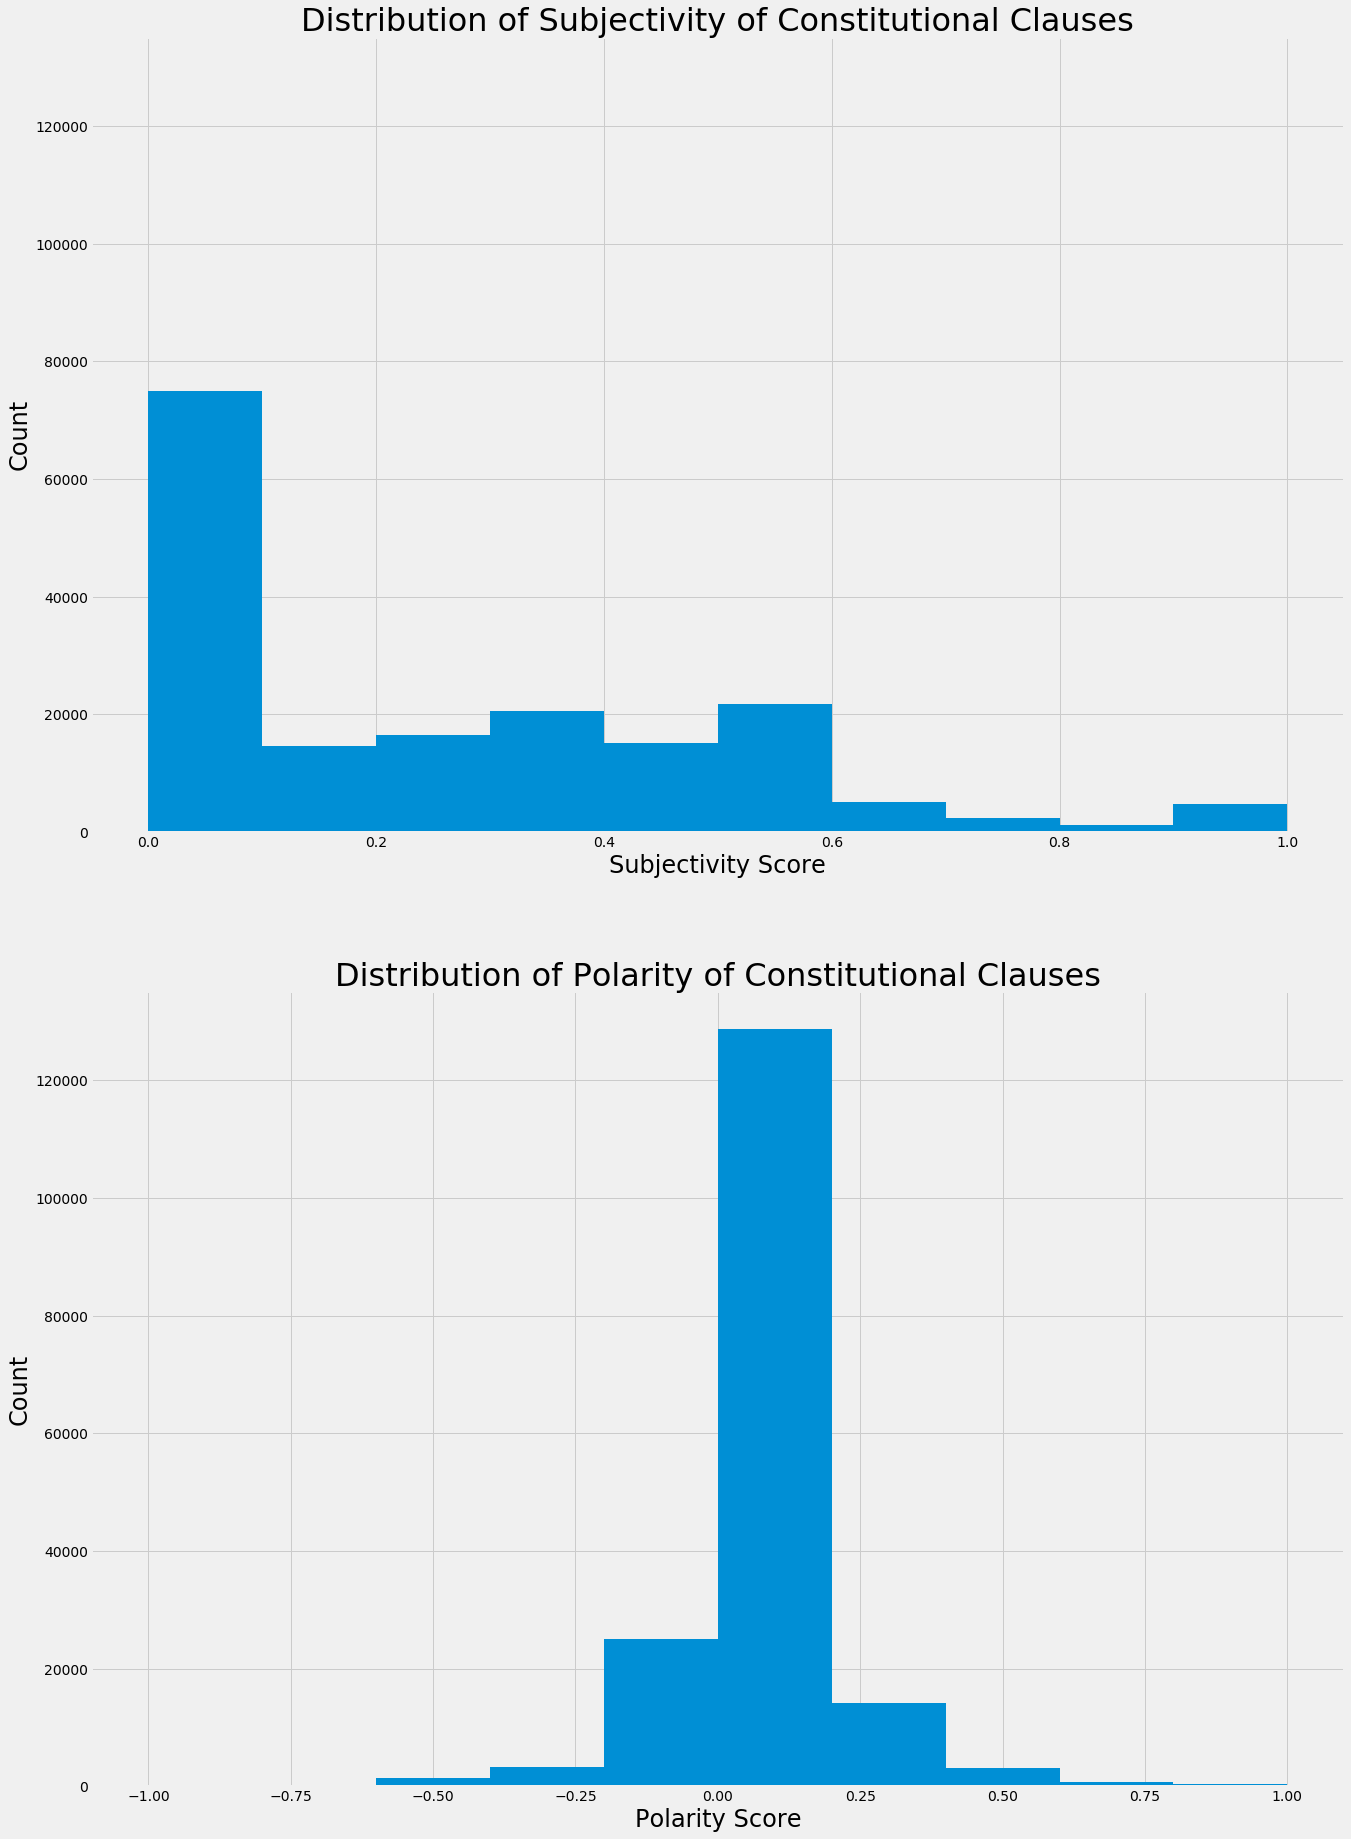

In [20]:
%matplotlib inline
plt.style.use('fivethirtyeight')


fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharey=True, figsize=(20, 30))


ax0.hist(df_cons.Subjectivity)
ax0.set_title("Distribution of Subjectivity of Constitutional Clauses", size=32)
ax0.set_ylabel("Count", size=24)
ax0.set_xlabel("Subjectivity Score", size=24);

ax1.hist(df_cons.Polarity)
ax1.set_title("Distribution of Polarity of Constitutional Clauses", size=32)
ax1.set_ylabel("Count", size=24)
ax1.set_xlabel("Polarity Score", size=24);

Groupby to try to get the share of clauses in a Country's constitution which are zero subjectivity

In [21]:
subjective_zero = df_cons.groupby(df_cons['Country'])['Subjectivity'].apply(lambda x: x[x==0].count())
clause_count_by_country = df_cons.groupby(df_cons['Country'])['Clause'].count()
share_of_clauses_zero_subjective = subjective_zero / clause_count_by_country

(0, 1)

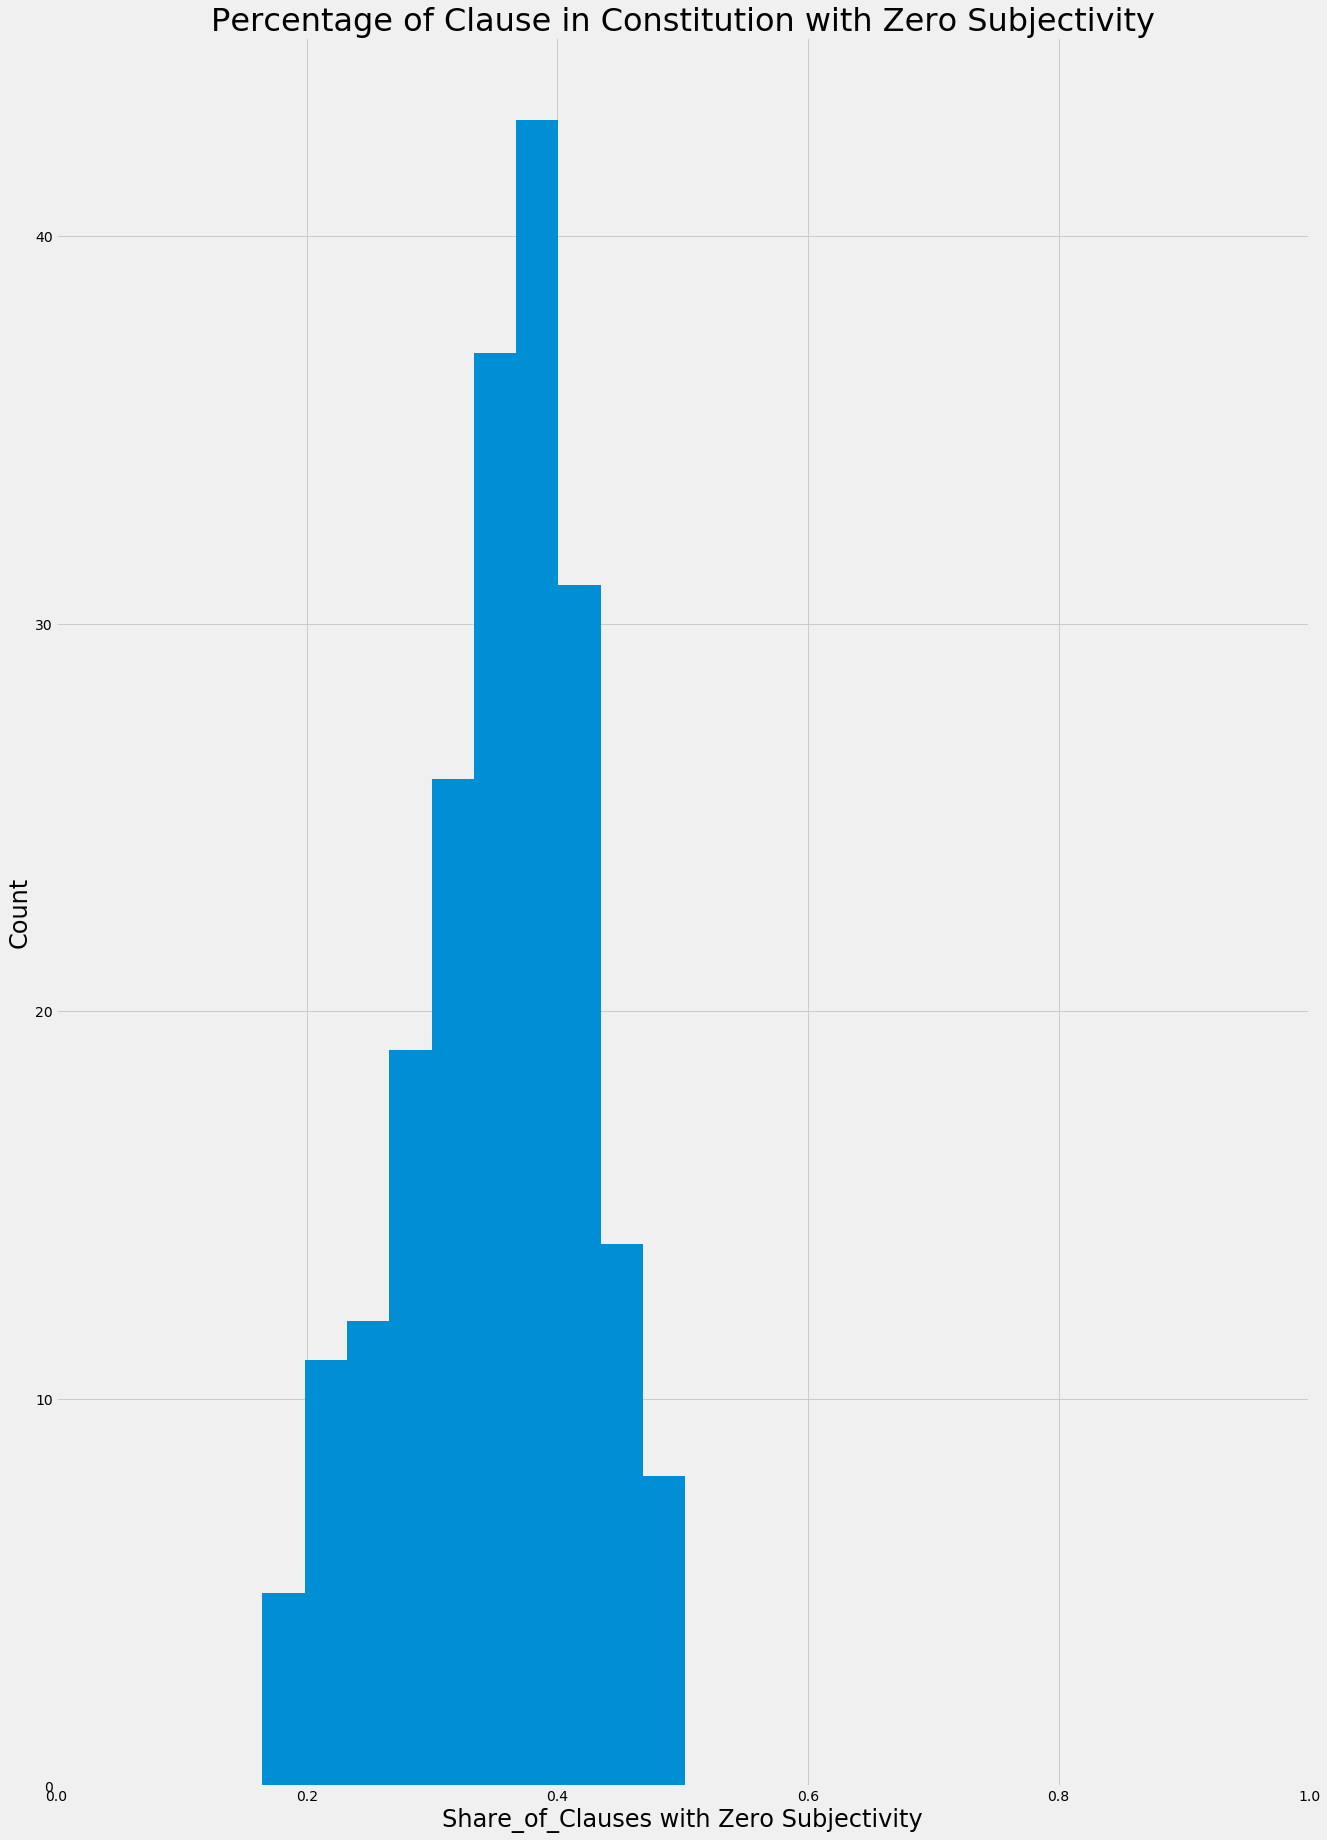

In [22]:
%matplotlib inline
plt.style.use('fivethirtyeight')


fig, ax0 = plt.subplots(figsize=(20, 30))


ax0.hist(share_of_clauses_zero_subjective)
ax0.set_title("Percentage of Clause in Constitution with Zero Subjectivity", size=32)
ax0.set_ylabel("Count", size=24)
ax0.set_xlabel("Share_of_Clauses with Zero Subjectivity", size=24)
ax0.set_xlim(0,1)

### Try to improve Topic Modeling with Subjectivity

See if the topics get any cleaner based on my subjectivity thesis

In [27]:
#Subjectivity Not Zero
tfidf = TfidfVectorizer(stop_words='english', min_df= .01)
bag_tfidif = tfidf.fit_transform(np.array(df_cons.loc[df_cons.Subjectivity != 0 ,
                                                      'Stemmed_Clause']))
nmf_model = NMF(n_components=10, random_state=47)
nmf_topics = nmf_model.fit_transform(bag_tfidif)

In [28]:
fletcher.get_lda_top_components(nmf_model,
                                tfidf.get_feature_names(),
                                top_words = 30)

Topic 1:
member elect shall vote parliament hous year repres day commiss parti candid elector number major polit senat assembl speaker held council period term date meet deputi session gener time follow
Topic 2:
right freedom human citizen protect ha articl guarante everi fundament properti polit equal exercis life enjoy work individu duti social educ secur inform cultur restrict limit respect peopl republ health
Topic 3:
ani proceed author relat function act time question matter reason make purpos exercis includ order law impos requir subsect power forc offic befor fund confer offenc respect action otherwis direct
Topic 4:
court high judg suprem appeal justic jurisdict decis proceed chief judici case shall tribun crimin befor order determin question constitut ha matter administr appoint rule civil final compet refer applic
Topic 5:
person hi ha offenc shall everi reason appoint subject crimin subsect legal act section entitl hold case author requir wa inform purpos age unless befor co

In [29]:
#Subjectivity Zero
tfidf = TfidfVectorizer(stop_words='english', min_df= .01)
bag_tfidif = tfidf.fit_transform(np.array(df_cons.loc[df_cons.Subjectivity == 0 ,
                                                      'Stemmed_Clause']))
nmf_model = NMF(n_components=10, random_state=47)
nmf_topics = nmf_model.fit_transform(bag_tfidif)

In [30]:
fletcher.get_lda_top_components(nmf_model,
                                tfidf.get_feature_names(),
                                top_words = 30)

Topic 1:
shall commiss provid regul day gener year citizen power fund claus committe hi thi servic determin present everi governor appli establish senat peopl forc speaker submit exercis accord report protect
Topic 2:
articl freedom right thi paragraph claus provis govern protect power appli term duti refer legisl accord feder forc provid schedul citizen local function mean applic specifi intern requir oath offic
Topic 3:
presid republ offic vice hi elect appoint resign deputi constitut senat term remov day council head case submit propos territori declar function execut intern assembl oath approv chief exercis present
Topic 4:
law regul establish organ accord determin constitut forc provid procedur author feder make condit rule intern govern power provis right function enact respect execut protect local prescrib republ ani order
Topic 5:
nation assembl council legisl secur peopl chapter territori govern approv senat servic power vote organ day establish execut propos committe resolut 

Not really a clean separation like I hypothesized.

### See similarity across Constitutions

We saw a couple of sanity checks for the US Constitution.  How well do our topic models correspond across different countries.  For a given clause in a country's constitution, what is the closest clause from another country's constitution?  Some clauses don't work great, but below I have an example of two which are kind of close

In [26]:
#Reload best model into the name space
tfidf = TfidfVectorizer(stop_words='english', min_df= .01, ngram_range=(1,3))
bag_tfidif = tfidf.fit_transform(np.array(df_cons['Stemmed_Clause']))
nmf_model = NMF(n_components=10, random_state=47)
nmf_topics = nmf_model.fit_transform(bag_tfidif)

In [27]:
print (df_cons.loc[168966,'Clause'])
nmf_topics[168966]

A well regulated Militia, being necessary to the security of a free State, the right of the people to keep and bear Arms, shall not be infringed.


array([0.00143063, 0.        , 0.03525285, 0.        , 0.        ,
       0.03136544, 0.00150678, 0.        , 0.        , 0.        ])

In [148]:
def similar_clause (df_cons, doc_topic_matrix, clause_index):
    """
    Pass the data frame and a document topic matrix, find
    the clause from another constitution that has the best
    cosine similarity based on the document_topic vector
    """
    
    #get cosine similarity for clause and all other documents
    #python list, technically 2D numpy array
    #make a copy of list which country clauses will be removed from
    
    cosine_list = cosine_similarity(doc_topic_matrix[clause_index].reshape(1,-1), 
                                    nmf_topics)
    cosine_list = list(cosine_list[0,])
    copy_cosine_list = deepcopy(cosine_list)
    
    #Get list of indices of country_constitution index
    #Want to get most similar clause excluding this Country
    country_index_list = df_cons.index[df_cons['Country'] == df_cons.loc[clause_index,
                                                                         "Country"]].tolist()
    #Remove those values from the copy of  cosines
    del copy_cosine_list[country_index_list[0]:country_index_list[-1] + 1]
    
    max_similarity = max(copy_cosine_list)
    
    similar_index = cosine_list.index(max_similarity)
    
    print (df_cons.loc[clause_index,"Country"])
    print (df_cons.loc[clause_index,"Clause"])
    #print (doc_topic_matrix[clause_index])
    print ("\n")
    print ("Most Similar Clause from Another Country")
    print (df_cons.loc[similar_index,"Country"])
    print (df_cons.loc[similar_index,"Clause"])
    #print (doc_topic_matrix[similar_index])


In [149]:
similar_clause(df_cons,nmf_topics,168966)

United_States_of_America_1992
A well regulated Militia, being necessary to the security of a free State, the right of the people to keep and bear Arms, shall not be infringed.


Most Similar Clause from Another Country
Mozambique_2007
2. With a view to guaranteeing the right to the environment within the framework of sustainable development, the State shall adopt policies aimed at:


In [150]:
similar_clause(df_cons,nmf_topics,84194)

Mexico_2015
Education provided by the State shall develop harmoniously all human abilities and will stimulate in pupils the love for the country, respect for human rights and the principles of international solidarity, independence and justice.


Most Similar Clause from Another Country
Eritrea_1997
1. The State shall strive to create opportunities to ensure the fulfillment of citizens' rights to social justice and economic development and to fulfill their material and spiritual needs.


## Analyze on Constitution Level Based on Topic Composition

In [31]:
copy_df_cons = df_cons

In [32]:
len(nmf_topics[ : ,0])

176787

In [ ]:
row_sum= []

for row in nmf_topics:
    row_sum.append(sum(row))

In [35]:
#Load into dataframe copies of topic weight for each clause
copy_df_cons['Topic1'] = nmf_topics[ : ,0]
copy_df_cons['Topic2'] = nmf_topics[ : ,1]
copy_df_cons['Topic3'] = nmf_topics[ : ,2]
copy_df_cons['Topic4'] = nmf_topics[ : ,3]
copy_df_cons['Topic5'] = nmf_topics[ : ,4]
copy_df_cons['Topic6'] = nmf_topics[ : ,5]
copy_df_cons['Topic7'] = nmf_topics[ : ,6]
copy_df_cons['Topic8'] = nmf_topics[ : ,7]
copy_df_cons['Topic9'] = nmf_topics[ : ,8]
copy_df_cons['Topic10'] = nmf_topics[ : ,9]
copy_df_cons['TopicTotal'] = row_sum


In [115]:
len(row_sum)

176787

In [36]:
row_sum[3]

0.0351341970144982

In [38]:
sum(nmf_topics[3])

0.0351341970144982

In [ ]:
#replace_in_row_sum .01 if zero
#some are all zero for topics in the NMF document-topic matrix

In [39]:
row_sum.count(0)

3077

In [40]:
row_sum_no_zeros = [.0001 if x == 0 else x for x in row_sum]

In [41]:
row_sum_no_zeros.count(0)

0

In [42]:
# New Topic Total Column with no Zeros, Zeros Replaced
copy_df_cons['TopicTotal'] = row_sum_no_zeros

In [43]:
#Get Standardized Weights Based on the Total Weights in the row / document
copy_df_cons['Topic1_Adj'] = copy_df_cons['Topic1'] / copy_df_cons['TopicTotal']
copy_df_cons['Topic2_Adj'] = copy_df_cons['Topic2'] / copy_df_cons['TopicTotal']
copy_df_cons['Topic3_Adj'] = copy_df_cons['Topic3'] / copy_df_cons['TopicTotal']
copy_df_cons['Topic4_Adj'] = copy_df_cons['Topic4'] / copy_df_cons['TopicTotal'] 
copy_df_cons['Topic5_Adj'] = copy_df_cons['Topic5'] / copy_df_cons['TopicTotal']
copy_df_cons['Topic6_Adj'] = copy_df_cons['Topic6'] / copy_df_cons['TopicTotal']
copy_df_cons['Topic7_Adj'] = copy_df_cons['Topic7'] / copy_df_cons['TopicTotal']
copy_df_cons['Topic8_Adj'] = copy_df_cons['Topic8'] / copy_df_cons['TopicTotal']
copy_df_cons['Topic9_Adj'] = copy_df_cons['Topic9'] / copy_df_cons['TopicTotal']
copy_df_cons['Topic10_Adj'] = copy_df_cons['Topic10'] / copy_df_cons['TopicTotal']

In [177]:
#GroupBy Country and Sum 
topic_weights_df = copy_df_cons.groupby('Country')['Topic1_Adj', 'Topic2_Adj',
                               'Topic3_Adj', 'Topic4_Adj',
                               'Topic5_Adj', 'Topic6_Adj',
                               'Topic7_Adj', 'Topic8_Adj',
                               'Topic9_Adj', 'Topic10_Adj'].sum()

In [178]:
#Total 
topic_weights_df['Total'] = topic_weights_df[list(topic_weights_df.columns)].sum(axis=1)

In [179]:
topic_weights_df.head()

,Topic1_Adj,Topic2_Adj,Topic3_Adj,Topic4_Adj,Topic5_Adj,Topic6_Adj,Topic7_Adj,Topic8_Adj,Topic9_Adj,Topic10_Adj,Total
Country,,,,,,,,,,,
Afghanistan_2004,38.324599,13.703888,77.642434,22.442356,7.518478,21.796229,36.540493,18.770855,5.769501,30.491168,273.0
Albania_2016,80.493573,74.937739,202.318702,92.759987,31.810634,81.676677,61.988137,71.258608,39.369013,62.386931,799.0
Algeria_2016,83.380360,38.754709,172.376992,27.537153,16.765799,62.940700,84.976931,71.936155,25.383871,48.947331,633.0
Andorra_1993,29.531636,34.471316,78.480420,19.861354,11.808510,34.947934,14.165030,8.212329,12.756172,31.765298,276.0
Angola_2010,85.259066,100.610588,314.631178,67.035150,124.427512,130.588065,130.484092,104.213400,51.465998,86.284952,1195.0


In [180]:
topic_weights_df['Topic1_Adj'] = topic_weights_df['Topic1_Adj'] / topic_weights_df['Total']
topic_weights_df['Topic2_Adj'] = topic_weights_df['Topic2_Adj'] / topic_weights_df['Total']
topic_weights_df['Topic3_Adj'] = topic_weights_df['Topic3_Adj'] / topic_weights_df['Total']
topic_weights_df['Topic4_Adj'] = topic_weights_df['Topic4_Adj'] / topic_weights_df['Total'] 
topic_weights_df['Topic5_Adj'] = topic_weights_df['Topic5_Adj'] / topic_weights_df['Total']
topic_weights_df['Topic6_Adj'] = topic_weights_df['Topic6_Adj'] / topic_weights_df['Total']
topic_weights_df['Topic7_Adj'] = topic_weights_df['Topic7_Adj'] / topic_weights_df['Total']
topic_weights_df['Topic8_Adj'] = topic_weights_df['Topic8_Adj'] / topic_weights_df['Total']
topic_weights_df['Topic9_Adj'] = topic_weights_df['Topic9_Adj'] / topic_weights_df['Total']
topic_weights_df['Topic10_Adj'] = topic_weights_df['Topic10_Adj'] / topic_weights_df['Total']

In [181]:
topic_weights_df.head()

,Topic1_Adj,Topic2_Adj,Topic3_Adj,Topic4_Adj,Topic5_Adj,Topic6_Adj,Topic7_Adj,Topic8_Adj,Topic9_Adj,Topic10_Adj,Total
Country,,,,,,,,,,,
Afghanistan_2004,0.140383,0.050197,0.284405,0.082206,0.027540,0.079840,0.133848,0.068758,0.021134,0.111689,273.0
Albania_2016,0.100743,0.093789,0.253215,0.116095,0.039813,0.102224,0.077582,0.089185,0.049273,0.078081,799.0
Algeria_2016,0.131723,0.061224,0.272318,0.043503,0.026486,0.099432,0.134245,0.113643,0.040101,0.077326,633.0
Andorra_1993,0.106999,0.124896,0.284349,0.071961,0.042784,0.126623,0.051323,0.029755,0.046218,0.115092,276.0
Angola_2010,0.071346,0.084193,0.263290,0.056096,0.104123,0.109279,0.109192,0.087208,0.043068,0.072205,1195.0


In [182]:
#Drop old Total column
topic_weights_df.drop(['Total'],axis=1,inplace=True)

In [183]:
#Add new Total Column , want to check it is all 1's
topic_weights_df['Total'] = topic_weights_df[list(topic_weights_df.columns)].sum(axis=1)

In [184]:

topic_weights_df['Total'].sum()

206.0

In [185]:
df_cons.columns

Index(['Clause', 'Country', 'Polarity', 'Stemmed_Clause', 'Subjectivity',
       'Year_Amended', 'Year_Enacted', 'Topic1', 'Topic2', 'Topic3', 'Topic4',
       'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10',
       'TopicTotal', 'Topic1_Adj', 'Topic2_Adj', 'Topic3_Adj', 'Topic4_Adj',
       'Topic5_Adj', 'Topic6_Adj', 'Topic7_Adj', 'Topic8_Adj', 'Topic9_Adj',
       'Topic10_Adj'],
      dtype='object')

In [186]:
#Add total Clause
clause_count_agg = df_cons.groupby('Country')['Clause'].agg('count')
year_enacted = df_cons.groupby('Country')['Year_Enacted'].agg('max')
topic_weights_df['Total_Clauses'] = clause_count_agg
topic_weights_df['Year_Enacted'] = year_enacted

In [187]:
topic_weights_df.columns

Index(['Topic1_Adj', 'Topic2_Adj', 'Topic3_Adj', 'Topic4_Adj', 'Topic5_Adj',
       'Topic6_Adj', 'Topic7_Adj', 'Topic8_Adj', 'Topic9_Adj', 'Topic10_Adj',
       'Total', 'Total_Clauses', 'Year_Enacted'],
      dtype='object')

In [188]:
#distance only dataframe
country_vectors_only  = topic_weights_df.drop(['Total','Total_Clauses',
                                                          'Year_Enacted'],axis=1,inplace=False)

In [189]:
country_vectors_only.head()

,Topic1_Adj,Topic2_Adj,Topic3_Adj,Topic4_Adj,Topic5_Adj,Topic6_Adj,Topic7_Adj,Topic8_Adj,Topic9_Adj,Topic10_Adj
Country,,,,,,,,,,
Afghanistan_2004,0.140383,0.050197,0.284405,0.082206,0.027540,0.079840,0.133848,0.068758,0.021134,0.111689
Albania_2016,0.100743,0.093789,0.253215,0.116095,0.039813,0.102224,0.077582,0.089185,0.049273,0.078081
Algeria_2016,0.131723,0.061224,0.272318,0.043503,0.026486,0.099432,0.134245,0.113643,0.040101,0.077326
Andorra_1993,0.106999,0.124896,0.284349,0.071961,0.042784,0.126623,0.051323,0.029755,0.046218,0.115092
Angola_2010,0.071346,0.084193,0.263290,0.056096,0.104123,0.109279,0.109192,0.087208,0.043068,0.072205


In [190]:
topic_weights_df[pd.isnull(topic_weights_df.Year_Enacted)]

,Topic1_Adj,Topic2_Adj,Topic3_Adj,Topic4_Adj,Topic5_Adj,Topic6_Adj,Topic7_Adj,Topic8_Adj,Topic9_Adj,Topic10_Adj,Total,Total_Clauses,Year_Enacted
Country,,,,,,,,,,,,,
Iceland_2011D,0.134911,0.094307,0.246080,0.045019,0.185750,0.107588,0.041597,0.043736,0.052027,0.048985,1.0,339,NaN
Libya_2016D,0.111994,0.042384,0.275643,0.042820,0.228717,0.083386,0.046975,0.075979,0.030800,0.061302,1.0,558,NaN
Syria_2017D,0.106918,0.061578,0.324596,0.055571,0.007019,0.101326,0.124661,0.128197,0.031455,0.058678,1.0,299,NaN
Yemen_2015D,0.121161,0.073478,0.353881,0.047206,0.029377,0.109267,0.079167,0.045600,0.061695,0.079167,1.0,897,NaN


In [191]:
topic_weights_df.loc['Iceland_2011D', 'Year_Enacted'] = 2011
topic_weights_df.loc['Libya_2016D', 'Year_Enacted'] = 2016
topic_weights_df.loc['Syria_2017D', 'Year_Enacted'] = 2017
topic_weights_df.loc['Yemen_2015D', 'Year_Enacted'] = 2015

In [255]:
nearest_constitution_list = []
cosine_similarity_value = []
nearest_constitution_year_enacted_list = []
all_closest_constitutions_list_of_list =[]

for country in country_vectors_only.index.values:
    distance_array = cosine_similarity(country_vectors_only.loc[country].reshape(1,-1), 
                                    country_vectors_only ) 
    
    
    descending_indices = (-distance_array).argsort()
    country_list = []
    
    for index in descending_indices[0, :]:
        country_list.append(country_vectors_only.iloc[index].name)
        
    
    all_closest_constitutions_list_of_list.append(country_list)
    
    
    array_list = list(distance_array[0, ])
    
    #Make a copy which the largest value won't be removed from
    #Largest value will be similarity with self
    copy_array_list = deepcopy(array_list)
    
    
    max_similarity = max(array_list)
    
    array_list.remove(max_similarity)
    
    second_largest = max(array_list)
    
    cosine_similarity_value.append(second_largest)
    
    index_of_second_largest = copy_array_list.index(second_largest)
    
    nearest_country = country_vectors_only.index.values[index_of_second_largest]
    
    nearest_constitution_list.append(nearest_country)
    
    nearest_constitution_year_enacted_list.append(int(topic_weights_df.loc[nearest_country,'Year_Enacted']))
    
    
    
    

/Users/whetfield/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [259]:
len(all_closest_constitutions_list_of_list)

206

In [245]:
country_vectors_only.iloc[40].name

'Costa_Rica_2011'

In [247]:
descending_indices.shape

(1, 206)

In [254]:
for index in descending_indices[0,:]:
    print(country_vectors_only.iloc[index].name)
    

Afghanistan_2004
Bulgaria_2015
Micronesia_1990
Palau_1992
Algeria_2016
Comoros_2009
Monaco_2002
Republic_of_Korea_1987
Turkey_2011
Burkina_Faso_2012
Libya_2012
Mali_1992
Tunisia_2014
Morocco_2011
Taiwan_2005
Haiti_2012
South_Sudan_2013
Syria_2017D
Austria_2013
Honduras_2013
Colombia_2015
Surinam_1992
Bahrain_2012
Hungary_2016
Peoples_Republic_of_Korea_1998
Costa_Rica_2011
Argentina_1994
Sudan_2005
Albania_2016
Yemen_2015D
Syria_2012
Central_African_Republic_2013
Panama_2004
Madagascar_2010
Iran_1989
Mexico_2015
Kuwait_1992
Nicaragua_2014
Iraq_2005
Venezuela_2009
Peru_2009
Benin_1990
Bosnia_Herzegovina_2009
Georgia_2013
El_Salvador_2014
Liechtenstein_2011
Niger_2010
Democratic_Republic_of_the_Congo_2011
Philippines_1987
Qatar_2003
Brazil_2017
Ukraine_2014
France_2008
United_Arab_Emirates_2009
Yemen_2015
Indonesia_2002
Angola_2010
Kyrgyz_Republic_2010
Mongolia_2001
Spain_2011
Myanmar_2008
Tajikistan_2003
Ecuador_2015
Switzerland_2014
Andorra_1993
Gabon_2011
Italy_2012
Cameroon_2008
Guine

In [236]:
cosine_similarity(country_vectors_only.loc['St_Kitts_and_Nevis_1983'].reshape(1,-1), 
                                    country_vectors_only ).argsort().shape

/Users/whetfield/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(1, 206)

In [232]:
(-cosine_similarity(country_vectors_only.loc['St_Kitts_and_Nevis_1983'].reshape(1,-1), 
                                    country_vectors_only)).argsort()

/Users/whetfield/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


1

In [231]:
country_vectors_only.loc['St_Kitts_and_Nevis_1983']

Topic1_Adj     0.127683
Topic2_Adj     0.192721
Topic3_Adj     0.115325
Topic4_Adj     0.054608
Topic5_Adj     0.007102
Topic6_Adj     0.043303
Topic7_Adj     0.074181
Topic8_Adj     0.012022
Topic9_Adj     0.235918
Topic10_Adj    0.137138
Name: St_Kitts_and_Nevis_1983, dtype: float64

In [193]:
nearest_constitution_year_enacted_list[4]

2006

In [233]:
len([ 10, 199, 150,  68, 103, 162,  36, 153,  91,   7, 188,  97,  15,
        121, 105, 161,  82,  58, 142,  44,  55, 178, 119,  96, 107, 141,
         94,  56,  43, 122, 124, 180,  20, 148,  29, 191,  60, 156, 177,
        189,  53, 179, 112,  67,  18,  31,  52,  41, 146,  74,  72, 173,
        102,  79,  28, 149, 151,  39,  27,  51,  61, 160,  49,  73,   0,
          4, 202, 115,  42,   2, 155,  34,  87, 203,  95, 172, 154,  65,
         98, 194,  16,  25,  46, 133,  32, 176, 185,  99, 132, 108, 106,
         59,  84,   9, 104, 197, 145, 118,  23, 136,  54, 201,  57,  38,
          1, 190, 164,  80,  77, 123,  26,  47, 139,  33,  78,  35, 166,
        135, 147, 117, 167,  21,  83,  70,   3, 120, 138, 183, 143, 144,
         64, 125,  40,  63,  76,  12, 130,   6,  89,  37,  86, 195,  45,
        126,  85,  90, 198,   8, 101,  19,  48, 175, 182, 200, 129, 165,
        181, 184,  81, 111, 110, 137,  30, 186, 127, 193,  92, 114, 204,
         13, 128, 168, 140,  69, 113,  66, 134, 159, 131, 205, 157, 196,
         62,  11, 152, 109, 187, 192, 158,  88,  75,  50,  24, 170,  71,
          5, 174,  93,  22, 171, 163,  17,  14, 116, 100, 169])

206

In [194]:
from collections import Counter
Counter(nearest_constitution_list)

Counter({'Albania_2016': 2,
         'Algeria_2016': 2,
         'Andorra_1993': 1,
         'Antigua_and_Barbuda_1981': 5,
         'Armenia_2015': 1,
         'Austria_2013': 1,
         'Bahrain_2012': 1,
         'Bangladesh_2014': 1,
         'Belarus_2004': 3,
         'Belgium_2014': 1,
         'Belize_2011': 1,
         'Benin_1990': 1,
         'Bhutan_2008': 2,
         'Bolivia_2009': 1,
         'Brazil_2017': 2,
         'Bulgaria_2015': 5,
         'Burkina_Faso_2012': 1,
         'Burundi_2005': 1,
         'Cameroon_2008': 1,
         'Canada_2011': 1,
         'Central_African_Republic_2010': 1,
         'China_2004': 1,
         'Colombia_2015': 2,
         'Comoros_2009': 3,
         'Congo_2001': 1,
         'Costa_Rica_2011': 1,
         'Croatia_2013': 2,
         'Cuba_2002': 1,
         'Democratic_Republic_of_the_Congo_2011': 2,
         'Djibouti_2010': 1,
         'Dominican_Republic_2010': 1,
         'Dominican_Republic_2015': 1,
         'East_Timor_2002'

In [195]:
len(nearest_constitution_list)

206

In [198]:
topic_weights_df['Nearest_Constitution'] = nearest_constitution_list
topic_weights_df['Similarity_Nearest'] = cosine_similarity_value
topic_weights_df['Nearest_Year_Enacted']= nearest_constitution_year_enacted_list

In [205]:
topic_weights_df['Years_to_Closest'] = abs(topic_weights_df.Year_Enacted.apply(int) - topic_weights_df.Nearest_Year_Enacted)

In [206]:
topic_weights_df.head()

,Topic1_Adj,Topic2_Adj,Topic3_Adj,Topic4_Adj,Topic5_Adj,Topic6_Adj,Topic7_Adj,Topic8_Adj,Topic9_Adj,Topic10_Adj,Total,Total_Clauses,Year_Enacted,Nearest_Constitution,Similarity_Nearest,Nearest_Year_Enacted,Years_to_Closest
Country,,,,,,,,,,,,,,,,,
Afghanistan_2004,0.140383,0.050197,0.284405,0.082206,0.027540,0.079840,0.133848,0.068758,0.021134,0.111689,1.0,274,2004,Bulgaria_2015,0.982599,1991,13
Albania_2016,0.100743,0.093789,0.253215,0.116095,0.039813,0.102224,0.077582,0.089185,0.049273,0.078081,1.0,813,1998,Turkey_2011,0.987825,1982,16
Algeria_2016,0.131723,0.061224,0.272318,0.043503,0.026486,0.099432,0.134245,0.113643,0.040101,0.077326,1.0,640,1989,Bulgaria_2015,0.990302,1991,2
Andorra_1993,0.106999,0.124896,0.284349,0.071961,0.042784,0.126623,0.051323,0.029755,0.046218,0.115092,1.0,279,1993,Morocco_2011,0.989710,2011,18
Angola_2010,0.071346,0.084193,0.263290,0.056096,0.104123,0.109279,0.109192,0.087208,0.043068,0.072205,1.0,1213,2010,Serbia_2006,0.994601,2006,4


In [204]:
topic_weights_df.loc['Bulgaria_2015']

Topic1_Adj                            0.122152
Topic2_Adj                           0.0741652
Topic3_Adj                             0.27349
Topic4_Adj                           0.0715589
Topic5_Adj                           0.0194763
Topic6_Adj                           0.0807845
Topic7_Adj                            0.160472
Topic8_Adj                           0.0911655
Topic9_Adj                           0.0434949
Topic10_Adj                           0.063242
Total                                        1
Total_Clauses                              543
Year_Enacted                              1991
Nearest_Constitution    Republic_of_Korea_1987
Similarity_Nearest                    0.993336
Nearest_Year_Enacted                      1948
Name: Bulgaria_2015, dtype: object

In [207]:
#couple constitutuions of NaN in year enacted, may need to adjuist
topic_weights_df.to_csv("Topic_Weights.csv")

In [196]:
len(topic_weights_df.index)

206

In [ ]:
#PCA of New Space

In [208]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(country_vectors_only)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [210]:
pca.components_

array([[ 0.13479112,  0.33329836, -0.62384878,  0.0583734 , -0.05362527,
        -0.18746167, -0.22787373, -0.22665888,  0.50233688,  0.29066858],
       [ 0.30931152,  0.05920219,  0.58085623,  0.01397225,  0.04453807,
        -0.08205735, -0.5120762 , -0.53379203,  0.06879323,  0.05125209]])

In [221]:
pca.explained_variance_ratio_

array([0.4872413 , 0.15336902])

In [212]:
country_vectors_pca = pca.transform(country_vectors_only)

In [213]:
country_vectors_only.shape

(206, 10)

In [214]:
country_vectors_pca.shape

(206, 2)

In [217]:
type(country_vectors_pca)

numpy.ndarray

In [220]:
country_vectors_pca[:,0]

array([-0.08049187, -0.04216626, -0.08704384, -0.02901055, -0.07546581,
        0.25805395, -0.0158441 , -0.07373677,  0.06038162, -0.06850062,
       -0.07667761,  0.22288366, -0.03753591,  0.11349494,  0.26169042,
       -0.10744763, -0.00261353,  0.23117537, -0.08246809,  0.03141749,
       -0.1336041 , -0.01937257,  0.19621988, -0.07096312,  0.19755909,
       -0.08251278, -0.05011663, -0.0626328 , -0.0829535 , -0.08353204,
        0.15308082, -0.07331477, -0.051851  , -0.0583459 , -0.0637735 ,
       -0.02977823, -0.18786865, -0.01508812, -0.04931819, -0.06497133,
       -0.03224356, -0.07632385, -0.04808181, -0.08283547, -0.15876779,
        0.09644521, -0.0381672 , -0.0438226 ,  0.08799503, -0.05592547,
        0.24670778, -0.03714144, -0.0515261 , -0.07247782, -0.08112059,
       -0.05564601, -0.07513174, -0.06290133, -0.1244609 , -0.04006329,
       -0.09097465, -0.06617194,  0.16734372,  0.08350958, -0.00480883,
       -0.05347196,  0.11491869, -0.09002545, -0.10172202,  0.11

In [222]:
import matplotlib.pyplot as plt
%matplotlib inline

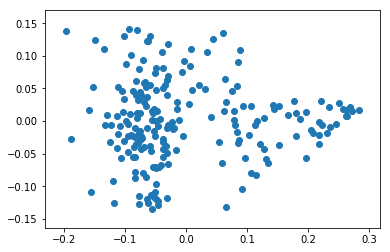

In [224]:
plt.scatter(country_vectors_pca[:,0],country_vectors_pca[:,1])

In [262]:
len(all_closest_constitutions_list_of_list)

206

In [261]:
topic_weights_df['PCA_1'].describe()

count    2.060000e+02
mean    -3.132607e-17
std      1.118534e-01
min     -1.971187e-01
25%     -7.661479e-02
50%     -4.539882e-02
75%      7.921202e-02
max      2.836442e-01
Name: PCA_1, dtype: float64

In [225]:
topic_weights_df['PCA_1'] = country_vectors_pca[:,0]
topic_weights_df['PCA_2'] = country_vectors_pca[:,1]

In [226]:
topic_weights_df.to_csv("Topic_Weights.csv")

In [263]:
topic_weights_df['List_of_Neighbors'] = all_closest_constitutions_list_of_list

In [264]:
topic_weights_df.loc['Japan_1946','List_of_Neighbors'][0:10]

['Japan_1946',
 'Jordan_2016',
 'Norway_2016',
 'Liechtenstein_2011',
 'Philippines_1987',
 'Bhutan_2008',
 'Netherlands_2008',
 'Denmark_1953',
 'Uruguay_2004',
 'Thailand_2017']

In [269]:
topic_weights_df.loc['Cuba_2002', 
                     'Nearest_Constitution']

'China_2004'